# Supervised evaluation

In [20]:
import sys
sys.path.append("/Users/alessiogandelli/dev/internship/BERTopic_evaluation/src/utils")
from supervised import Supervised
from supervised import get_test_dataset
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# simple supervised evaluation

## Dataset 
The supervised dataset is a collection of tweets that have been extracted according to their hashtag, in the first exmaple we have bitcoin, ukrainian war, formula1, trump and climatechange. The tweets are in a folder and each topic should be in a jsonl file with the name of the topic. The jsonl data have been ectracted using twarc2.

Then two version of the same dataset have been created, one with the original tweets and one with the tweets without the hashtags.

In [99]:
df = get_test_dataset('./../../data/simple_supervised/')
df_no_hash = df.copy()
df_no_hash['text'] = df_no_hash['text'].str.replace(r'#\S+', '', case=False)

getting dataset


In [100]:
df_pol = get_test_dataset('./../../data/politics_supervised/')
df_pol_no_hash = df.copy()
df_pol_no_hash['text'] = df_pol_no_hash['text'].str.replace(r'#\S+', '', case=False)

getting dataset


## Evaluation

using the Supervised class, we can evaluate the dataset using different models, the accepted one are 
- NMF  
- Bertopic with openai embeddings 
- Bertopic with any sentence transformer embeddings model (https://huggingface.co/sentence-transformers)
    we are using: climatebert, tweetclassification, all-minil6v2
- Bertopic with USE
- 


In [ ]:
gsdmm = Supervised(df, 'GSDMM')
climatebert = Supervised(df, 'climatebert/distilroberta-base-climate-f')
tweetclass = Supervised(df, 'louisbetsch/tweetclassification-bf-model')
nmf = Supervised(df, 'NMF')
bert = Supervised(df, 'all-MiniLM-L6-v2')
openai_eval = Supervised(df, 'openai')
use = Supervised(df, 'USE')


## Results 
first we can see the comparison between bertopic and traditional modes, then we will see the comparison between bertopic with different embeddings models.

before lookng at the accuracy it is important to note the min_topic_share metric, which define , for each inferred topic, the percentage of documents that are assigned to the same class. A value of 0.9 in the topic 1 means that 90% of the documents of a topic have been assigned to topic 1. when this value is low, it means that the topic is not well defined. Especially is the difference between the first two topics is low 

In [ ]:

def compare_models(models):
    # barplot grouped by column

    pd.DataFrame(models).T.plot.bar(rot=0, figsize=(10,5))
    #add title
    plt.title('Accuracy of the models')
    #add grid every 0.1
    plt.grid(axis='y', alpha=0.5)
    #add yticks every 0.1
    plt.yticks(np.arange(0, 1.1, 0.1))
    # legend outside 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


models = {'bert': bert.accuracy[0]['accuracy'], 'nmf': nmf.accuracy[0]['accuracy'], 'gsdmm': gsdmm.accuracy[0]['accuracy']}
compare_models(models)

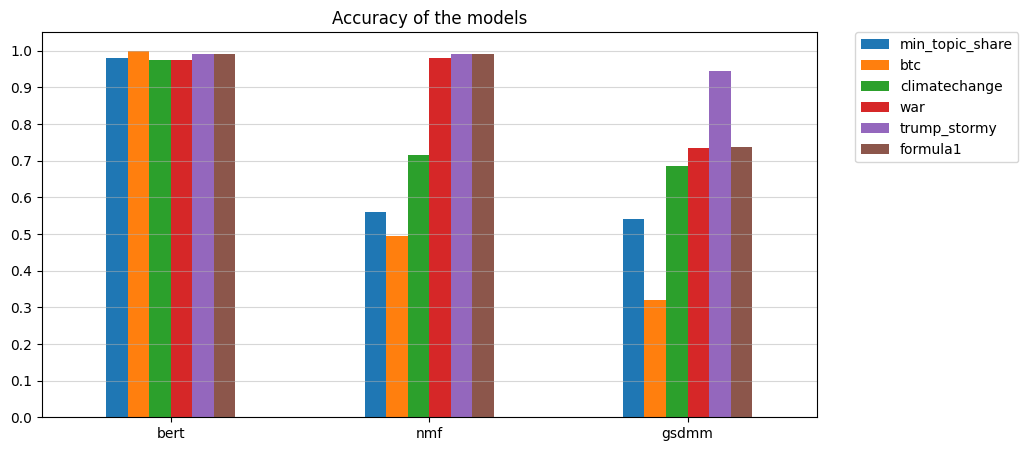

In [ ]:
models = {'bert': bert.accuracy[0]['accuracy'], 'nmf': nmf.accuracy[0]['accuracy'], 'gsdmm': gsdmm.accuracy[0]['accuracy']}
compare_models(models)

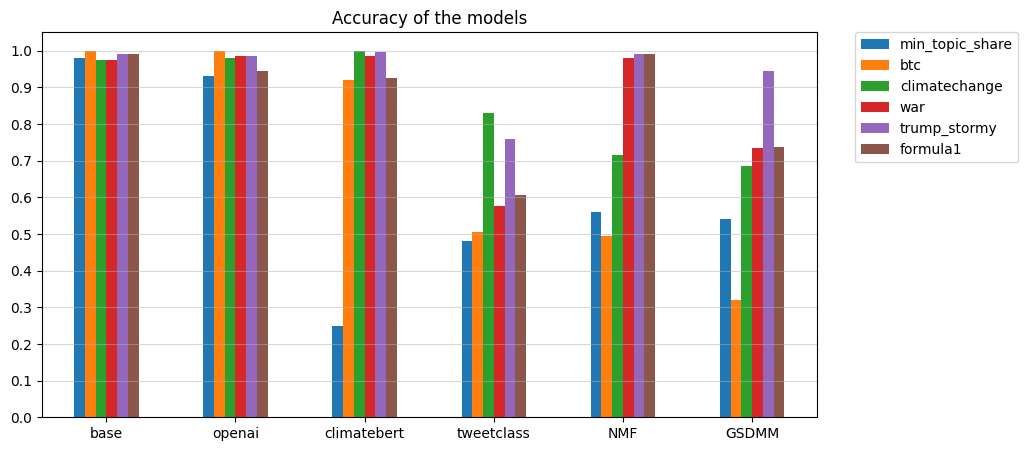

In [ ]:
bert_models = {  'base': bert.accuracy[0]['accuracy'], 
                'openai': openai_eval.accuracy[0]['accuracy'], 
                #'U.S.E' : use.accuracy[0]['accuracy'],
                'climatebert': climatebert.accuracy[0]['accuracy'],
                'tweetclass': tweetclass.accuracy[0]['accuracy'],
                'NMF': nmf.accuracy[0]['accuracy'],
                'GSDMM': gsdmm.accuracy[0]['accuracy']}

compare_models(bert_models)


### Heatmap

Text(0.5, 1.0, 'GSDMM')

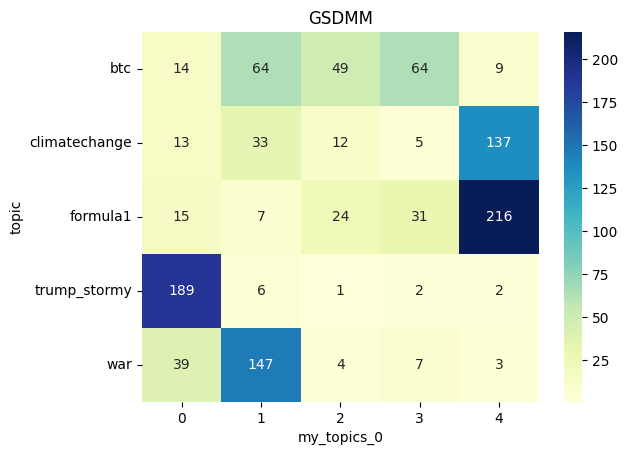

In [22]:
gsdmm.visualize_heatmap()

## Evaluation without hashags 
that was an easy task since all the documents in a topic had the same hashtag, now er try to remove all the hashtags to see how it will affect the results  

In [23]:
#%%
#bert = Supervised(df, 'all-MiniLM-L6-v2')
#openai_eval = Supervised(df, 'openai')

bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2', n_iter= 10)
openai_no_hash = Supervised(df_no_hash, 'openai',n_iter= 10)
nmf_no_hash = Supervised(df_no_hash, 'NMF',n_iter= 1)
#use = Supervised(df_no_hash, "USE" ,n_iter=10)



evaluate all-MiniLM-L6-v2
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate NMF
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 


In [ ]:

openai_no_hash.visualize_heatmap()

## Results 
For each model here we present two different results: the accuracy and the accuracy without outliers. In fact bertopic do not require each document be in a class, later we will explore if the outliers are really outliers or not.

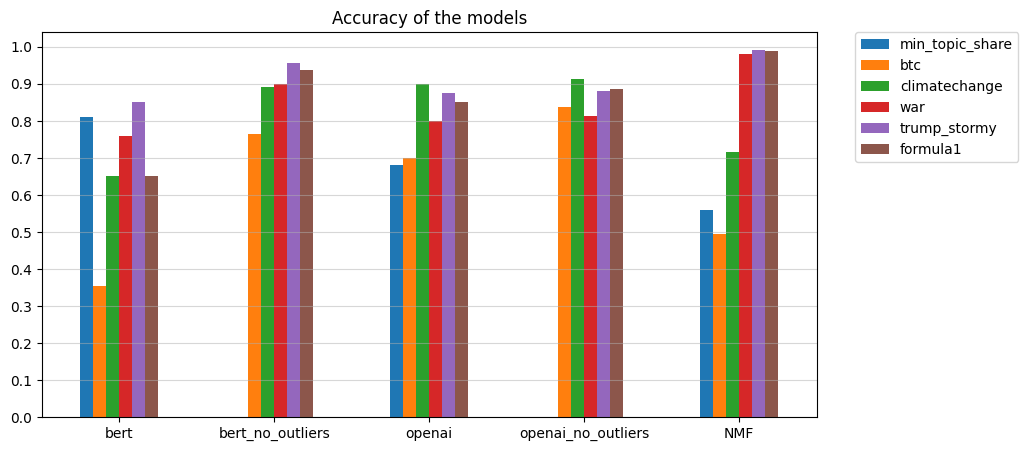

In [25]:
import pandas as pd

nohash_models = {'bert': bert_no_hash.accuracy[0]['accuracy'], 
                'bert_no_outliers': bert_no_hash.accuracy[0]['accuracy_no_outliers'], 

                'openai': openai_no_hash.accuracy[0]['accuracy'], 
                'openai_no_outliers': openai_no_hash.accuracy[0]['accuracy_no_outliers'],

                'NMF' : nmf.accuracy[0]['accuracy'],
                }

compare_models(nohash_models)




Text(0.5, 1.0, 'all-MiniLM-L6-v2')

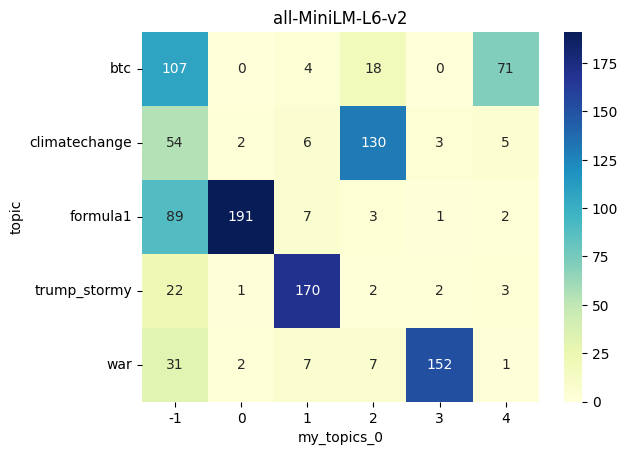

In [35]:
bert_no_hash.visualize_heatmap()

## outliers


In [32]:
df['openai_topics'] = openai_no_hash.df['my_topics_0']
df['bert_topics'] = bert_no_hash.df['my_topics_0']

<AxesSubplot: xlabel='bert_topics', ylabel='openai_topics'>

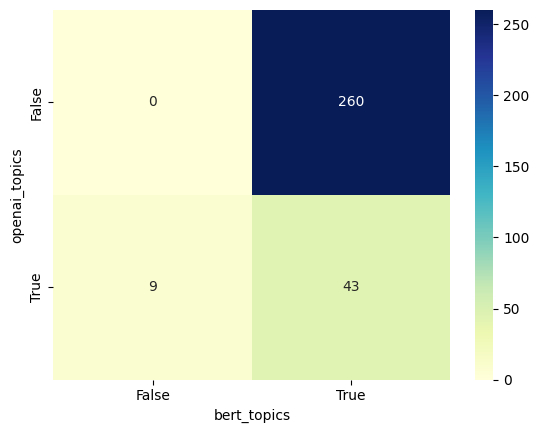

In [33]:

# df where openai or bert topics are -1
a = df[(df['openai_topics'] == -1) | (df['bert_topics'] == -1)]

# confusion matrix of this 
#sns.heatmap(pd.crosstab(a['openai_topics'], a['bert_topics']), annot=True, cmap="YlGnBu", fmt='g')

# confusion matrix 2x2 if -1 or not 
sns.heatmap(pd.crosstab(a['openai_topics'] == -1, a['bert_topics'] == -1), annot=True, cmap="YlGnBu", fmt='g')


In [48]:
# puliers for openai but not for bert 
a = df[(df['openai_topics'] == 0) & (df['topic'] != 'climatechange')]
a['text'].str.replace(r'#\S+', '', case=False).to_list()


['The latest The Android, iOS, IoT, Game Consoles, Crypto, Tech, Daily!  Thanks to @1margotromero05 @anurag24562 @next77  ',
 'Dm For sales ~   B              ',
 ' will only increase in popularity in the  is the time for a regimen change. ',
 'El Salvador has been named the safest country in Latin America (but I still found a way to scare my mom). did this 🔥 ',
 'This is so funny, the reason why  exists, and why we need it ',
 "🧡 We've created a new 🎓 educational section on our website with some recommended books and aicles to read. 📚          ",
 '      happening in a different way’  ',
 'The @WhiteHouse , @DOJPH and @USTreasury speaking at the @DCBlockchain23 summit.  Looking forward to @CleanSpark_Inc sharing the stage with @KenzieSigalos @CNBC @fgthiel @MarathonDH and Gabriel Ibghy from @HiveBlockchain later today.      ',
 'Check out this item on OpenSea  przez @opensea             ',
 'There’s no second best  ',
 'Here we go….again. Come say hi  is Built for This. Kiln Pearl St.

Text(0.5, 1.0, 'openai climatechange misclassified')

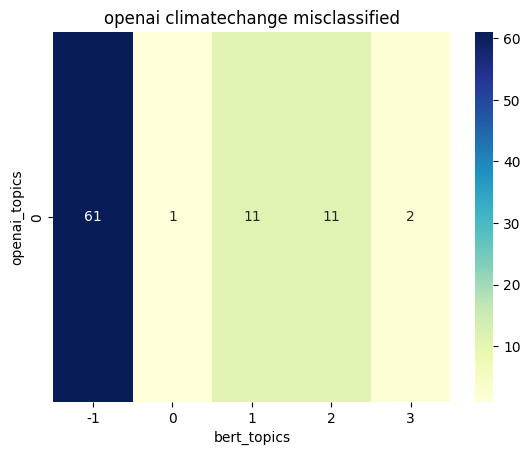

In [52]:
# heatmap of a 
sns.heatmap(pd.crosstab(a['openai_topics'], a['bert_topics']), annot=True, cmap="YlGnBu", fmt='g').set_title('openai climatechange misclassified')

# Politics supervised evaluation

In [53]:
df = get_test_dataset('./../../data/politics_supervised/')
df_no_hash = df.copy()
df_no_hash['text'] = df_no_hash['text'].str.replace(r'#\S+', '', case=False)

getting dataset


In [56]:
#gsdmm = Supervised(df, 'GSDMM')
#climatebert = Supervised(df, 'climatebert/distilroberta-base-climate-f')
#tweetclass = Supervised(df, 'louisbetsch/tweetclassification-bf-model')
nmf = Supervised(df, 'NMF')
bert = Supervised(df, 'all-MiniLM-L6-v2', n_iter=100)
openai_eval = Supervised(df, 'openai', n_iter=100)
#use = Supervised(df, 'USE')

evaluate NMF
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate all-MiniLM-L6-v2


/Users/alessiogandelli/dev/internship/BERTopic_evaluation/src/utils/supervised.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df['my_topics_'+str(n)] = topics


topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy 

/Users/alessiogandelli/dev/internship/BERTopic_evaluation/src/utils/supervised.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df['my_topics_'+str(n)] = topics


topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy 

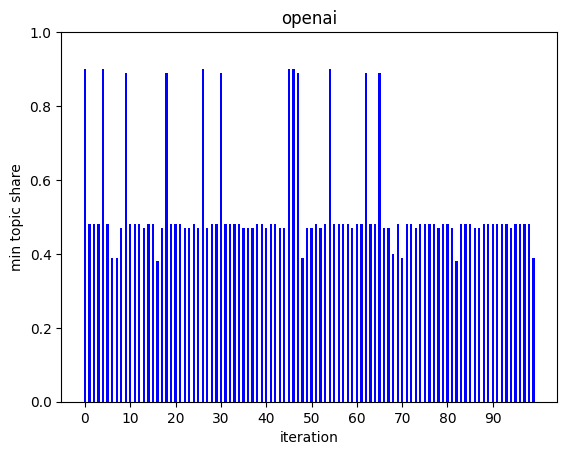

In [63]:
        # create a figure and axis
min_topic_size = [acc['accuracy']['min_topic_share'] for acc in openai_eval.accuracy]

fig, ax = plt.subplots()
#bar plot
ax.bar(range(len(min_topic_size)), min_topic_size, color='blue', width=0.5) 


ax.set_xlabel('iteration')
ax.set_ylabel('min topic share')
ax.set_title( openai_eval.name)

# y lim 0-1 
ax.set_ylim(0,1)

# x ticks every 10
ax.set_xticks(np.arange(0, len(min_topic_size), 10))

plt.show()


## Results

In [ ]:
models = {'bert': bert.accuracy, 'openai': openai_eval.accuracy, 'tweet classification': tweetclass.accuracy, 'climatebert': climatebert.accuracy, 'gsdmm': gsdmm.accuracy, 'nmf': nmf.accuracy }
compare_models(models)

In [64]:
nmf_no_hash = Supervised(df_no_hash, 'NMF')
bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2', n_iter= 10)
openai_no_hash = Supervised(df_no_hash, 'openai', n_iter= 10)

evaluate NMF
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate all-MiniLM-L6-v2
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
eval

In [ ]:
openai_no_hash.visualize_min_topic_share()

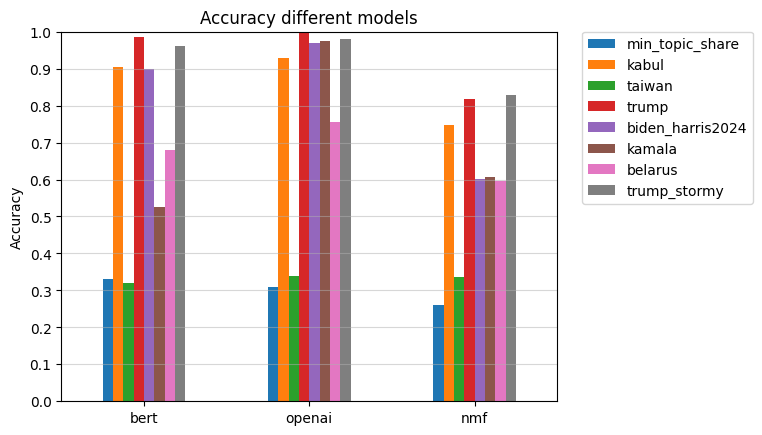

In [98]:
models = {'bert': bert_no_hash.accuracy[0],
          'openai': openai_no_hash.accuracy[0],
          'nmf': nmf_no_hash.accuracy[0]['accuracy']}

df = pd.DataFrame()
df['bert'] = bert_no_hash.accuracy[0]['accuracy']
df['openai'] = openai_no_hash.accuracy[0]['accuracy']
df['nmf'] = nmf_no_hash.accuracy[0]['accuracy']

df_share = pd.DataFrame()
df_share['openai_topic_share'] = openai_no_hash.accuracy[0]['topic_share']
df_share['bert_topic_share'] = bert_no_hash.accuracy[0]['topic_share']
df_share['nmf_topic_share'] = nmf_no_hash.accuracy[0]['topic_share']

fig = df.T.plot.bar()


fig.set_ylabel('Accuracy')
fig.set_title('Accuracy different models')

fig.set_ylim(0,1)

fig.set_xticklabels(['bert', 'openai', 'nmf'])

# yticks
fig.set_yticks(np.arange(0, 1.1, 0.1))

#grid evrey 0,1
fig.grid(axis='y', alpha=0.5)

#rotate xticks
fig.set_xticklabels(fig.get_xticklabels(), rotation=0)




#add yticks every 0.1
#plt.yticks(np.arange(0, 1.1, 0.1))
# legend outside 
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



In [ ]:

def compare_models(models):
    # barplot grouped by column

    pd.DataFrame(models).T.plot.bar(rot=0, figsize=(10,5))
    #add title
    plt.title('Accuracy of the models')
    #add grid every 0.1
    plt.grid(axis='y', alpha=0.5)
    #add yticks every 0.1
    plt.yticks(np.arange(0, 1.1, 0.1))
    # legend outside 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


In [ ]:
df = get_test_dataset('/Users/alessiogandelli/dev/internship/BERTopic_evaluation/data/US_supervised')
df_no_hash = df.copy()
df_no_hash['text'] = df_no_hash['text'].str.replace(r'#\S+', '', case=False)

In [ ]:
nmf = Supervised(df, 'NMF')
bert = Supervised(df, 'all-MiniLM-L6-v2')
openai_eval = Supervised(df, 'openai')

In [ ]:
models = {'bert': bert.accuracy, 'openai': openai_eval.accuracy, 'nmf': nmf.accuracy }
compare_models(models)

In [ ]:
bert.visualize_heatmap()

In [ ]:
nmf_no_hash = Supervised(df_no_hash, 'NMF')
bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2')
openai_no_hash = Supervised(df_no_hash, 'openai')

In [ ]:
models = {'bert': bert_no_hash.accuracy, 'openai': openai_no_hash.accuracy, 'nmf': nmf_no_hash.accuracy }
compare_models(models)

In [ ]:
bert_no_hash.visualize_heatmap()